In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
#Perform API calls
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_json)

{'cod': '400', 'message': 'Nothing to geocode'}


In [4]:
#Use a for loop to go through cities
#Use try and except for going through cities
# query_url = url + "appid=" + weather_api_key + "units" + "&q="
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#either make a dictionary to store key(city) and its values
lat = []
long =[]
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

city_name = []

for index,city in enumerate(cities):
    #try and except error
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(city)
        print("City number is " + str(index) + " & city name is " + city)
    except:
        print("City not found")

City number is 0 & city name is half moon bay
City number is 1 & city name is dingle
City number is 2 & city name is marondera
City number is 3 & city name is dossor
City not found
City number is 5 & city name is busselton
City number is 6 & city name is avarua
City number is 7 & city name is khatanga
City number is 8 & city name is marzuq
City number is 9 & city name is hithadhoo
City number is 10 & city name is hermanus
City number is 11 & city name is souillac
City number is 12 & city name is barranca
City number is 13 & city name is east london
City number is 14 & city name is sambava
City number is 15 & city name is tagusao
City number is 16 & city name is upernavik
City number is 17 & city name is erzin
City number is 18 & city name is osakarovka
City number is 19 & city name is pitimbu
City number is 20 & city name is castro
City number is 21 & city name is kapaa
City number is 22 & city name is klaksvik
City number is 23 & city name is butaritari
City number is 24 & city name i

City number is 205 & city name is lianran
City number is 206 & city name is rehoboth
City number is 207 & city name is mount isa
City number is 208 & city name is faanui
City number is 209 & city name is antalaha
City number is 210 & city name is domoni
City not found
City number is 212 & city name is pilas
City number is 213 & city name is new norfolk
City number is 214 & city name is ranot
City number is 215 & city name is la ronge
City number is 216 & city name is tura
City number is 217 & city name is independence
City number is 218 & city name is hilo
City number is 219 & city name is sawakin
City number is 220 & city name is norman wells
City number is 221 & city name is mufulira
City number is 222 & city name is amga
City number is 223 & city name is taoudenni
City number is 224 & city name is saint george
City number is 225 & city name is parainen
City not found
City number is 227 & city name is chimbote
City number is 228 & city name is leshukonskoye
City number is 229 & city 

City number is 406 & city name is nevelsk
City number is 407 & city name is hobyo
City number is 408 & city name is bathurst
City not found
City number is 410 & city name is arraial do cabo
City number is 411 & city name is imbituba
City number is 412 & city name is vyshneve
City number is 413 & city name is korla
City number is 414 & city name is winnemucca
City number is 415 & city name is lumeje
City number is 416 & city name is shingu
City number is 417 & city name is asheboro
City number is 418 & city name is belmonte
City number is 419 & city name is takaka
City number is 420 & city name is kuvshinovo
City number is 421 & city name is rawson
City not found
City number is 423 & city name is tshikapa
City number is 424 & city name is znamenskoye
City number is 425 & city name is paita
City number is 426 & city name is qandala
City number is 427 & city name is san jose
City number is 428 & city name is gannan
City number is 429 & city name is lavrentiya
City not found
City number is

In [5]:
#Create DataFrame
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long,
                           "Max Temp": max_temp, "Humidity": humidity,
                           "Cloudiness": cloudiness, "Wind Speed": wind,
                           "Country": country, "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,half moon bay,37.46,-122.43,15.00,93,90,4.60,US,1596628534
1,dingle,11.00,122.67,25.55,87,100,1.77,PH,1596628534
2,marondera,-18.19,31.55,24.21,20,0,2.36,ZW,1596628535
3,dossor,47.53,52.98,28.34,30,85,4.76,KZ,1596628535
4,busselton,-33.65,115.33,12.22,86,34,0.89,AU,1596628535
...,...,...,...,...,...,...,...,...,...
550,nishihara,26.18,127.76,29.00,83,75,4.10,JP,1596628637
551,omboue,-1.57,9.26,24.76,72,97,3.58,GA,1596628637
552,bathsheba,13.22,-59.52,28.00,74,40,7.20,BB,1596628637
553,yugo-kamskiy,57.71,55.59,24.00,69,20,5.00,RU,1596628637


In [6]:
#Check which cities have humidity > 100%
humidity_df = weather_df.loc[weather_df["Humidity"] > 100]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


There are no cities with humidity > 100%.

In [7]:
#Export DataFrame to CSV
weather_df.to_csv("output_data/cities.csv")

# Latitude vs. Temperature Plot

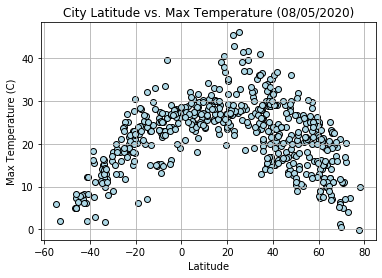

In [11]:
x = lat
y = max_temp

plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Max Temperature (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.savefig("output_data/Lat_Temp_Plot.png")
plt.show()

The Latitude vs. Temperature plot shows that the highest maximum temperatures take place roughly around 20 and 40 degrees latitude north of the equatorial plane.

# Latitude vs. Humidity Plot

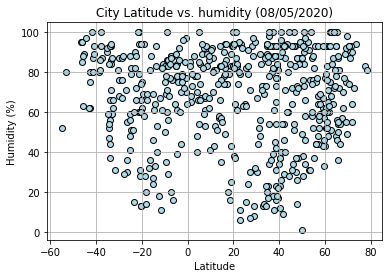

In [12]:
x = lat
y = humidity

plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. humidity (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_Humidity_Plot.png")
plt.show()

The Latitude vs. Humidity plot shows that cities even within the same latitiude experience a wide array of humidity.

# Latitude vs. Cloudiness Plot

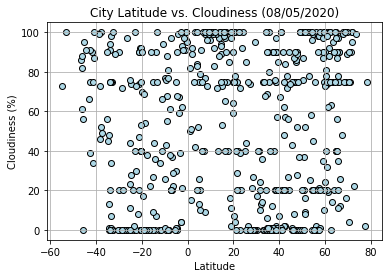

In [13]:
x = lat
y = cloudiness

plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Cloudiness (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_Cloudiness_Plot.png")
plt.show()

Similar to the Latitude vs. Humidity plot, the Latitude vs. Cloudiness plot also shows that cities even with the same latitude experience a variety of cloudiness.

# Latitude vs. Wind Speed Plot

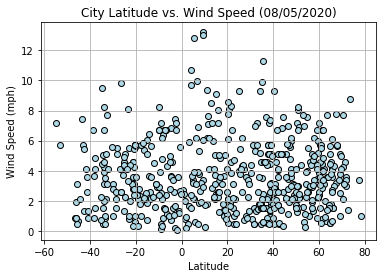

In [14]:
x = lat
y = wind

plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")

#Add title and other labels
plt.title("City Latitude vs. Wind Speed (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_Wind_Plot.png")
plt.show()

The Latitude vs. Wind Speed plot shows that the typical wind speed (mph) across latitudes tends to be between 0 and 8 mph and that anything above 12 mph may be examples of outliers.

# LINEAR REGRESSIONS

In [15]:
#Create Northern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,half moon bay,37.46,-122.43,15.00,93,90,4.60,US,1596628534
1,dingle,11.00,122.67,25.55,87,100,1.77,PH,1596628534
3,dossor,47.53,52.98,28.34,30,85,4.76,KZ,1596628535
6,khatanga,71.97,102.50,15.84,90,100,3.61,RU,1596628536
7,marzuq,14.40,46.47,33.02,35,89,2.13,YE,1596628536
...,...,...,...,...,...,...,...,...,...
548,twante,16.72,95.93,27.00,94,90,3.60,MM,1596628636
550,nishihara,26.18,127.76,29.00,83,75,4.10,JP,1596628637
552,bathsheba,13.22,-59.52,28.00,74,40,7.20,BB,1596628637
553,yugo-kamskiy,57.71,55.59,24.00,69,20,5.00,RU,1596628637


In [16]:
#Create Southern Hemisphere DataFrames
southern_df = weather_df.loc[weather_df["Lat"] <= 0]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,marondera,-18.19,31.55,24.21,20,0,2.36,ZW,1596628535
4,busselton,-33.65,115.33,12.22,86,34,0.89,AU,1596628535
5,avarua,-21.21,-159.78,23.00,94,74,3.60,CK,1596628536
8,hithadhoo,-0.60,73.08,28.13,70,100,5.59,MV,1596628536
9,hermanus,-34.42,19.23,15.00,52,13,0.45,ZA,1596628536
...,...,...,...,...,...,...,...,...,...
535,lichinga,-13.31,35.24,23.00,40,75,3.60,MZ,1596628634
545,boende,-0.22,20.87,28.48,64,95,2.49,CD,1596628636
547,ambovombe,-25.17,46.08,23.03,56,0,4.91,MG,1596628636
549,pouembout,-21.13,164.90,18.11,79,47,0.35,NC,1596628636


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.36575959624044624


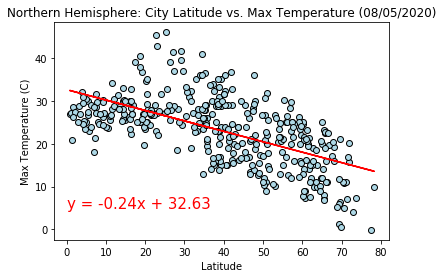

In [22]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,5),fontsize=15,color="red") 

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Temp_Plot.png")
plt.show()

The Northern Hemisphere - Max Temp vs. Latitude Linear Regression shows...

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6075962563679688


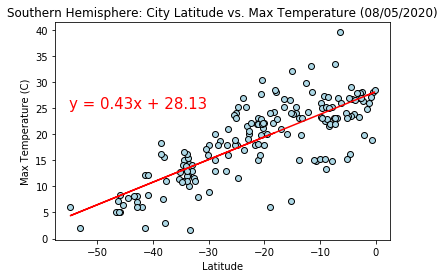

In [26]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Temp_Plot.png")
plt.show()

The Southern Hemisphere - Max Temp vs. Latitude Linear Regression shows...

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00013944252620817307


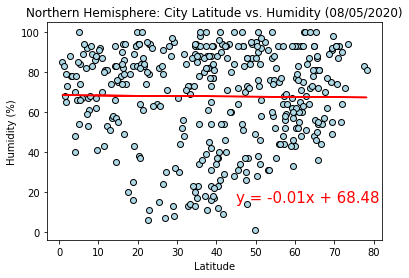

In [28]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,15),fontsize=15,color="red")

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Humidity (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Humidity_Plot.png")
plt.show()

The Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression shows that there is no correlation between latitude and humidity and that the regression line is not a good fit.

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018646812640716055


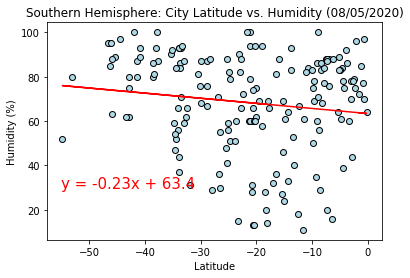

In [29]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Humidity (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Humidity_Plot.png")
plt.show()

Similar to the Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression, the Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression also shows that there is no correlation between latitude and humidity and that the regression line is not a good fit.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0027689334488456767


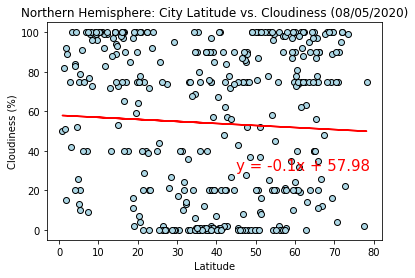

In [30]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,30),fontsize=15,color="red")

#Add title and other labels
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Cloudiness_Plot.png")
plt.show()

The Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression shows that there is no correlation between latitude and cloudiness and that the regression line is not a good fit.

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011627646907251293


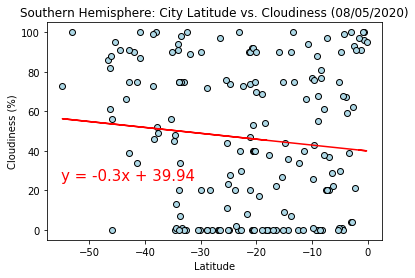

In [35]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Cloudiness_Plot.png")
plt.show()

Similar to the the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression, the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression also shows that there is no correlation between latitude and cloudiness and that the regression line is not a good fit.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004053449659769907


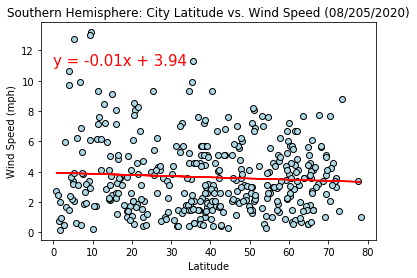

In [36]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,11),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (08/205/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/North_Lat_Wind_Plot.png")
plt.show()

The Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows that there is no correlation between latitude and wind speed and that the regression line is not a good fit.

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.78303208032289e-05


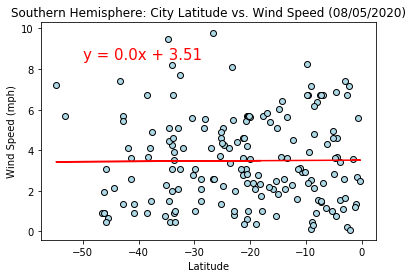

In [39]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,8.5),fontsize=15,color="red")

#Add title and other labels
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/South_Lat_Wind_Plot.png")
plt.show()

Similar to the Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression, the Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows that there is no correlation between latitude and wind speed.